In [1]:
from recurrent import RecurringEvent
import pandas as pd
from dateutil import rrule
import datetime
from matplotlib import pyplot as plt
from tools import *
import yaml
%matplotlib inline

In [2]:
frequency = 'starts March 10th 2018 every week until April 10th'
r = RecurringEvent()
r.parse(frequency)

'DTSTART:20180310\nRRULE:INTERVAL=1;FREQ=WEEKLY;UNTIL=20180410'

In [3]:
rr = rrule.rrulestr( r.get_RFC_rrule() )
rr

In [4]:
TODAY = pd.Timestamp('2018-03-10')
END = pd.Timestamp('2019-09-07')

In [5]:
rr.between(TODAY, END)

[datetime.datetime(2018, 3, 17, 0, 0),
 datetime.datetime(2018, 3, 24, 0, 0),
 datetime.datetime(2018, 3, 31, 0, 0),
 datetime.datetime(2018, 4, 7, 0, 0)]

In [6]:
[pd.to_datetime(date).normalize() for date in rr.between(TODAY, END)]

[Timestamp('2018-03-17 00:00:00'),
 Timestamp('2018-03-24 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-07 00:00:00')]

In [7]:
frequency = 'every week on Friday and Saturday starts March 10 2018'
dates = get_dates(frequency, TODAY, END)
dates[:10]

[Timestamp('2018-03-16 00:00:00'),
 Timestamp('2018-03-17 00:00:00'),
 Timestamp('2018-03-23 00:00:00'),
 Timestamp('2018-03-24 00:00:00'),
 Timestamp('2018-03-30 00:00:00'),
 Timestamp('2018-03-31 00:00:00'),
 Timestamp('2018-04-06 00:00:00'),
 Timestamp('2018-04-07 00:00:00'),
 Timestamp('2018-04-13 00:00:00'),
 Timestamp('2018-04-14 00:00:00')]

In [8]:
fun = pd.DataFrame(
    data={'fun': -40},
    index=pd.DatetimeIndex(pd.Series(dates))
)

In [9]:
print(fun.head())

            fun
2018-03-16  -40
2018-03-17  -40
2018-03-23  -40
2018-03-24  -40
2018-03-30  -40


In [10]:
sm = pd.date_range(start=TODAY, end=END, freq='SM')
ms = pd.date_range(start=TODAY, end=END, freq='MS')
income = pd.DataFrame(
    data={'income': 1000},
    index=pd.date_range(start=TODAY, end=END, freq='SM'))

rent = pd.DataFrame(
    data={'rent': -1500},
    index=pd.date_range(start=TODAY, end=END, freq='MS')
)

bank = pd.DataFrame(
    data={ 'bank': 2000},
    index=pd.date_range(start=TODAY, end=TODAY)
)

calendar = pd.DataFrame(index=pd.date_range(start=TODAY, end=END))
calendar = pd.concat([calendar, bank], axis=1).fillna(0)
calendar = pd.concat([calendar, income], axis=1).fillna(0)
calendar = pd.concat([calendar, rent], axis=1).fillna(0)
calendar = pd.concat([calendar, fun], axis=1).fillna(0)

In [11]:
calendar = update_totals(calendar)

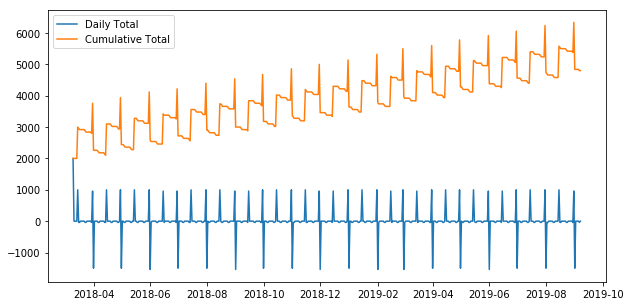

In [12]:
plot_budget(calendar, plt)

In [13]:
calendar.tail()

,bank,income,rent,fun,total,cum_total
2019-09-03,0.0,0.0,0.0,0.0,0.0,4840.0
2019-09-04,0.0,0.0,0.0,0.0,0.0,4840.0
2019-09-05,0.0,0.0,0.0,0.0,0.0,4840.0
2019-09-06,0.0,0.0,0.0,-40.0,-40.0,4800.0
2019-09-07,0.0,0.0,0.0,0.0,0.0,4800.0


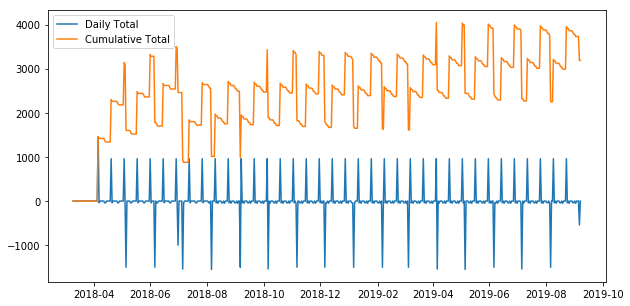

In [14]:
with open('data/budget.yaml', 'r') as f:
    inputs = yaml.load(f)
calendar_ = build_calendar(inputs, TODAY, END)
plot_budget(calendar_, plt)